# 形态学轮廓提取算法

In [2]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [44]:
src = cv2.cvtColor(cv2.imread('../datas/char.jpg'),cv2.COLOR_BGR2GRAY)

In [60]:
def morcontour_extraction(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape[0],src.shape[1]
    
    # 腐蚀
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            if src[i-1,j] == 255 and src[i,j] == 255 and \
                src[i+1,j] == 255 and src[i,j-1] == 255 and \
                src[i,j+1] == 255:
                dst[i,j] = 255
            else:
                dst[i,j] = 0
                
    # 提取边缘
    temp =  cv2.convertScaleAbs(src - dst)
    dst =  np.zeros_like(src)
    # 膨胀
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            if temp[i-1,j] == 255 or temp[i,j] == 255 or \
                temp[i+1,j] == 255 or temp[i,j-1] == 255 or \
                temp[i,j+1] == 255:
                dst[i,j] = 255
            else:
                dst[i,j] = 0
    return dst

In [61]:
binary = np.zeros_like(src)
idx = src >= 240
binary[idx] = 255
binary[~idx] = 0
dst = morcontour_extraction(binary)

Text(0.5,1,'DST')

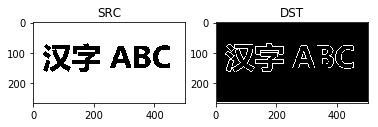

In [62]:
plt.subplot(121)
plt.imshow(binary,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('DST')

## OpenCV 实现

Text(0.5,1,'DST')

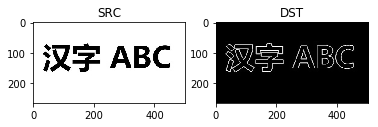

In [68]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))  

erode = cv2.erode(src,element)
dst = src - erode
dst = cv2.dilate(dst,element)

plt.subplot(121)
plt.imshow(src,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('DST')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45267595

[2]. https://blog.csdn.net/sunny2038/article/details/9137759

[3]. https://www.cnblogs.com/jsxyhelu/p/4491920.html

[4]. http://www.zealfilter.com/portal.php